# ROMS-TOOLS setup for Iceland1_MARBL_2024

First step is to set up the outer grid using ROMS-TOOLS and save the grid file.

In [1]:
from roms_tools import Grid

In [2]:
project='/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/'
datasets='/anvil/projects/x-ees250129/Datasets_subset/'
model_name='Iceland1'
child_name='Iceland2'
grid_path='/anvil/projects/x-ees250129/x-uheede/MATLAB/setup_r2r_phys+bgc/1.Make_grid/Iceland1_grid_MAT1.nc'

In [3]:
#%%time

#grid = Grid(
#    nx=512,
#    ny=512,
#    size_x=384,
#    size_y=384,
#    center_lon=-24,
#    center_lat=64.9,
#    rot=0,
#    topography_source={
#        "name": "SRTM15",
#        "path": datasets+"SRTM15/SRTM15_V2.6.nc"},
#    N=60  # number of vertical layers
#)

In [4]:
#%%time

#grid = Grid(
#    nx=512,
#    ny=384,
#    size_x=384,
#    size_y=288,
#    center_lon=-22.6,
#    center_lat=63.55,
#    rot=0,
#    topography_source={
#        "name": "SRTM15",
#        "path": datasets+"SRTM15/SRTM15_V2.6.nc"},
#    N=60  # number of vertical layers
#)

In [3]:
grid = Grid.from_file(grid_path)

2025-11-18 18:34:40 - WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
2025-11-18 18:34:40 - INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
2025-11-18 18:34:40 - INFO - Total time: 0.003 seconds
2025-11-18 18:34:40 - INFO - ========================================================================================================


In [4]:
grid.update_vertical_coordinate(N=60, theta_s=5.0, theta_b=2.0, hc=300.0, verbose=False)

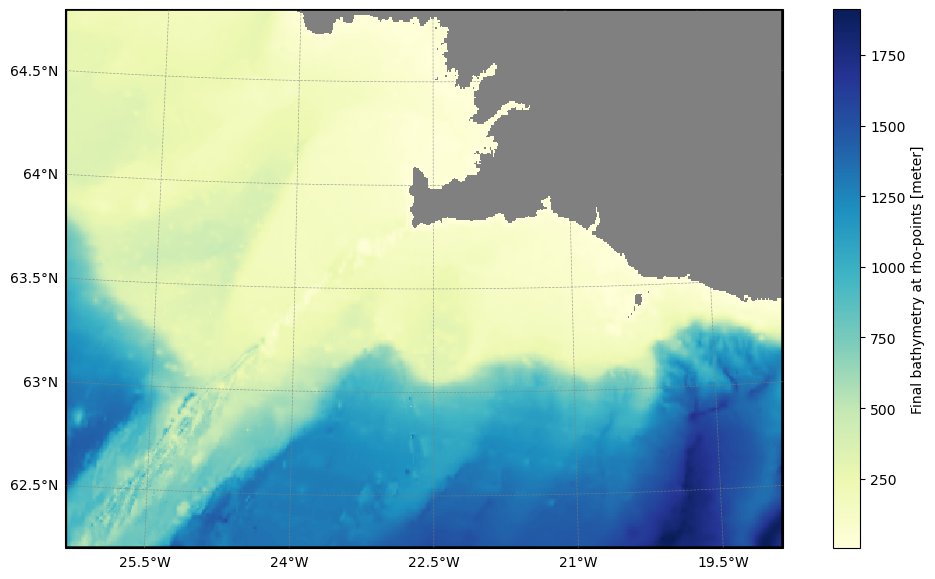

In [10]:
grid.plot()

In [5]:
filepath = project+model_name+'_grid.nc'
yaml_filepath=project+model_name+'_grid_60.yaml'

In [7]:
yaml_filepath

'/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_grid_60.yaml'

In [12]:
grid.save(filepath)

2025-10-29 17:54:08 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_grid.nc


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_grid.nc')]

In [6]:
grid.to_yaml(yaml_filepath)

In [10]:
tpxo_path = datasets+"TPXO/TPXO10.v2/"
tpxo_dict = {
    "grid": tpxo_path + "grid_tpxo10v2.nc",
    "h": tpxo_path + "h_tpxo10.v2.nc",
    "u": tpxo_path + "u_tpxo10.v2.nc",
}

Next, we set up tidal forcing:

In [11]:
from roms_tools import TidalForcing

In [13]:
from datetime import datetime

In [13]:
model_reference_date = datetime(2000, 1, 1)

In [14]:

tidal_forcing = TidalForcing(
    grid=grid,
    source={"name": "TPXO", "path": tpxo_dict},
    ntides=15,  # Number of constituents to consider <= 15. Default is 10.
    model_reference_date=model_reference_date,  # Model reference date. Default is January 1, 2000.
    use_dask=True
)

2025-10-27 13:02:37 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-10-27 13:02:37 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-10-27 13:02:38 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-10-27 13:02:38 - INFO - Applying 2D horizontal fill to the source data before regridding.


In [15]:
filepath = project+model_name+"_tides.nc"

In [16]:
%time tidal_forcing.save(filepath)

2025-10-27 13:02:38 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_tides.nc


[########################################] | 100% Completed | 6.04 sms
CPU times: user 2.87 s, sys: 1.11 s, total: 3.98 s
Wall time: 6.23 s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_tides.nc')]

For the surface forcing, we use ERA5 plus the unified BGC dataset

In [14]:
from roms_tools import Grid, SurfaceForcing

In [18]:
start_time = datetime(2023, 12, 1)
end_time = datetime(2024, 6, 30)

In [15]:
start_time1 = datetime(2024, 6, 1)
end_time1 = datetime(2024, 12, 1)

In [19]:
surface_forcing_kwargs = {
    "grid": grid,
    "start_time": start_time,
    "end_time": end_time,
    "type": "physics",
    "model_reference_date": datetime(2000, 1, 1), # this is the default
}

In [16]:
surface_forcing_kwargs1 = {
    "grid": grid,
    "start_time": start_time1,
    "end_time": end_time1,
    "type": "physics",
    "model_reference_date": datetime(2000, 1, 1), # this is the default
}

In [20]:
%%time

surface_forcing = SurfaceForcing(
    **surface_forcing_kwargs,
    source={"name": "ERA5"},
    use_dask=True,
)

2025-10-27 13:02:45 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.
2025-10-27 13:04:30 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bulk_frc.opt` ROMS option file.
2025-10-27 13:04:30 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-10-27 13:04:33 - INFO - Applying 2D horizontal fill to the source data before regridding.


CPU times: user 2min 49s, sys: 7.95 s, total: 2min 57s
Wall time: 3min


In [17]:
%%time

surface_forcing1 = SurfaceForcing(
    **surface_forcing_kwargs1,
    source={"name": "ERA5"},
    use_dask=True,
)

2025-10-29 17:55:31 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.
2025-10-29 17:57:16 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bulk_frc.opt` ROMS option file.
2025-10-29 17:57:17 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-10-29 17:57:20 - INFO - Applying 2D horizontal fill to the source data before regridding.


CPU times: user 2min 34s, sys: 12.6 s, total: 2min 46s
Wall time: 2min 50s


[########################################] | 100% Completed | 101.99 ms


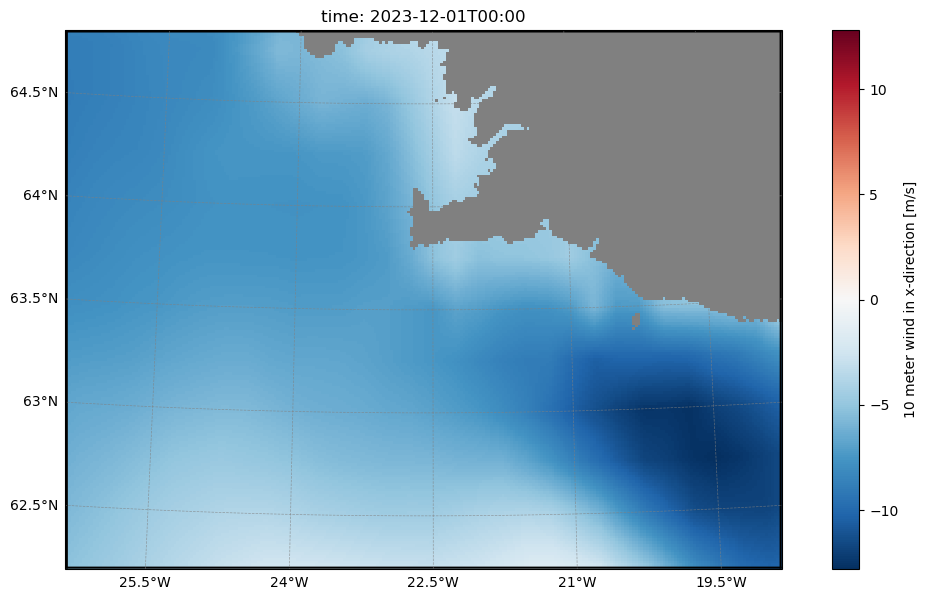

In [21]:
surface_forcing.plot("uwnd", time=0)

In [22]:
#cesm_bgc_path = "/global/cfs/projectdirs/m4746/Datasets/CESM_REGRIDDED/CESM-surface_lowres_regridded.nc"
unified_bgc_path = datasets+"UNIFIED/BGCdataset.nc"

In [23]:
%%time

unified_bgc_surface_forcing = SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "UNIFIED", "path": unified_bgc_path, "climatology": True},
    type="bgc",
    use_dask=True,
)

2025-10-27 13:05:48 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bgc.opt` ROMS option file.
2025-10-27 13:05:48 - INFO - 2D horizontal fill is skipped because source data already contains filled values.


CPU times: user 145 ms, sys: 8.95 ms, total: 154 ms
Wall time: 299 ms


In [18]:
filepath = project+model_name+"_surface_forcing2024.nc"

In [25]:
%time surface_forcing.save(filepath, group=True)

2025-10-27 13:05:53 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202312.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202401.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202402.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202403.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202404.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202405.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202406.nc


[########################################] | 100% Completed | 77.22 s
[########################################] | 100% Completed | 79.04 s
[########################################] | 100% Completed | 74.84 s
[########################################] | 100% Completed | 79.05 s
[########################################] | 100% Completed | 77.91 s
[########################################] | 100% Completed | 80.71 s
[########################################] | 100% Completed | 77.10 s
CPU times: user 15min 33s, sys: 2min 11s, total: 17min 44s
Wall time: 10min 47s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202312.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202401.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202402.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202403.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202404.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202405.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202406.nc')]

In [19]:
%time surface_forcing1.save(filepath, group=True)

2025-10-29 17:58:23 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202406.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202407.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202408.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202409.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202410.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202411.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202412.nc


[########################################] | 100% Completed | 73.88 s
[########################################] | 100% Completed | 76.59 s
[########################################] | 100% Completed | 77.23 s
[########################################] | 100% Completed | 76.66 s
[########################################] | 100% Completed | 75.70 s
[########################################] | 100% Completed | 74.32 s
[########################################] | 100% Completed | 409.54 ms
CPU times: user 12min 45s, sys: 2min, total: 14min 45s
Wall time: 9min 6s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202406.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202407.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202408.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202409.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202410.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202411.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_surface_forcing2024_202412.nc')]

In [26]:
filepath = project+model_name+"_bgc_surface_forcing.nc"

In [27]:
%time unified_bgc_surface_forcing.save(filepath)

2025-10-27 13:16:36 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_bgc_surface_forcing_clim.nc


[########################################] | 100% Completed | 206.46 ms
CPU times: user 161 ms, sys: 15 ms, total: 176 ms
Wall time: 310 ms


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland1_MARBL_2024/Iceland1_bgc_surface_forcing_clim.nc')]

Next we generate the initial file

In [28]:
from roms_tools import Grid, ChildGrid

In [29]:
parent_grid = grid

In [30]:
child_grid_parameters = {
    "nx": 512,
    "ny": 512,
    "size_x": 102.4,
    "size_y": 102.4,
    "center_lon": -22.4,
    "center_lat": 64.39,
    "rot": 0,
    "topography_source": {
        "name": "SRTM15",
        "path": datasets+"SRTM15/SRTM15_V2.6.nc"},
    "N":40  # number of vertical layers
}

In [31]:
child_grid = ChildGrid(
    **child_grid_parameters,
    parent_grid=parent_grid,
    boundaries={
        "south": True,
        "east": False,
        "north": False,
        "west": True,
    },  # this is the default
    metadata={"prefix": "child", "period": 1800.0}  # this is the default
)

ValueError: Some points are outside the grid. Please choose either a bigger parent grid or a smaller child grid.

In [ ]:
child_grid.plot_nesting(with_dim_names=True)

In [ ]:
filepath = project+child_name+"_grid.nc"
child_grid.save(filepath=filepath)

In [ ]:
filepath_nesting = project+child_name+"_edata.nc"

In [ ]:
child_grid.save_nesting(filepath=filepath_nesting)